In [1]:
from transformers import CLIPTokenizer

#定义checkpoint
checkpoint = 'CompVis/stable-diffusion-v1-4'

#加载tokenizer
tokenizer = CLIPTokenizer.from_pretrained(
    checkpoint,
    subfolder='tokenizer',
)

#添加新词
tokenizer.add_tokens('<cat-toy>')

tokenizer

PreTrainedTokenizer(name_or_path='CompVis/stable-diffusion-v1-4', vocab_size=49408, model_max_len=77, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>'})

In [2]:
#包含新词的描述
texts = [
    'a photo of a <cat-toy>',
    'a rendering of a <cat-toy>',
    'a cropped photo of the <cat-toy>',
    'the photo of a <cat-toy>',
    'a photo of a clean <cat-toy>',
    'a photo of a dirty <cat-toy>',
    'a dark photo of the <cat-toy>',
    'a photo of my <cat-toy>',
    'a photo of the cool <cat-toy>',
    'a close-up photo of a <cat-toy>',
    'a bright photo of the <cat-toy>',
    'a cropped photo of a <cat-toy>',
    'a photo of the <cat-toy>',
    'a good photo of the <cat-toy>',
    'a photo of one <cat-toy>',
    'a close-up photo of the <cat-toy>',
    'a rendition of the <cat-toy>',
    'a photo of the clean <cat-toy>',
    'a rendition of a <cat-toy>',
    'a photo of a nice <cat-toy>',
    'a good photo of a <cat-toy>',
    'a photo of the nice <cat-toy>',
    'a photo of the small <cat-toy>',
    'a photo of the weird <cat-toy>',
    'a photo of the large <cat-toy>',
    'a photo of a cool <cat-toy>',
    'a photo of a small <cat-toy>',
]

#图片列表,总共只有4张图片
files = [
    'datas/cat_toy/0.jpeg',
    'datas/cat_toy/1.jpeg',
    'datas/cat_toy/2.jpeg',
    'datas/cat_toy/3.jpeg',
]

In [3]:
import torch
import torchvision
import random
import PIL.Image
import numpy as np


#定义数据集
class Dataset(torch.utils.data.Dataset):

    def __init__(self):
        self.flip_transform = torchvision.transforms.RandomHorizontalFlip(
            p=0.5)

    def __len__(self):
        return len(files)

    def __getitem__(self, i):
        data = {}

        #选择选择一段文字,并编码
        data['input_ids'] = tokenizer(
            random.choice(texts),
            padding='max_length',
            truncation=True,
            max_length=77,
            return_tensors='pt',
        )['input_ids'][0]

        #加载图片
        image = PIL.Image.open(files[i])

        #图像增强
        image = PIL.Image.fromarray(np.array(image).astype(np.uint8))
        image = image.resize((512, 512), resample=PIL.Image.BICUBIC)
        image = self.flip_transform(image)
        image = np.array(image).astype(np.uint8)
        image = (image / 127.5 - 1.0).astype(np.float32)

        data['pixel_values'] = torch.from_numpy(image).permute(2, 0, 1)

        return data


dataset = Dataset()

len(dataset), dataset[0]

/tmp/ipykernel_18209/4077063204.py:35: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((512, 512), resample=PIL.Image.BICUBIC)


(4,
 {'input_ids': tensor([49406,   320,  1125,   539,   320,  3772, 49408, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407]),
  'pixel_values': tensor([[[ 0.1137,  0.2706,  0.2863,  ...,  0.1373,  0.1059,  0.1765],
           [ 0.1529,  0.1529,  0.1608,  ...,  0.2863,  0.2784,  0.2000],
           [ 0.1373,  0.0275, -0.1059,  ...,  0.3333,  0.3647,  0.2549],
           ...,
           [ 0.6784,  0.6627,  0.6627,  ...,  0.4667,  0.0902,  0.5137],
           [ 0.4510,  0.5294,  0.6863,

In [4]:
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for i, data in enumerate(loader):
    break

len(loader), data

/tmp/ipykernel_18209/4077063204.py:35: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((512, 512), resample=PIL.Image.BICUBIC)


(4,
 {'input_ids': tensor([[49406,   320,  1125,   539,   518,  2077, 49408, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
           49407, 49407, 49407, 49407, 49407, 49407, 49407]]),
  'pixel_values': tensor([[[[ 0.1765,  0.1059,  0.1373,  ...,  0.2863,  0.2706,  0.1137],
            [ 0.2000,  0.2784,  0.2863,  ...,  0.1608,  0.1529,  0.1529],
            [ 0.2549,  0.3647,  0.3333,  ..., -0.1059,  0.0275,  0.1373],
            ...,
            [ 0.5137,  0.0902,  0.4667,  ...,  0.6627,  0.6627,  0.6784],
            [ 0.5529,  0

In [5]:
from transformers import CLIPTextModel
from diffusers import AutoencoderKL, UNet2DConditionModel


def init_models():
    #加载模型
    text_encoder = CLIPTextModel.from_pretrained(checkpoint,
                                                 subfolder='text_encoder')
    vae = AutoencoderKL.from_pretrained(checkpoint, subfolder='vae')
    unet = UNet2DConditionModel.from_pretrained(checkpoint, subfolder='unet')

    text_encoder.train()
    vae.eval()
    unet.eval()

    #添加新词
    text_encoder.resize_token_embeddings(tokenizer.vocab_size + 1)

    #初始化新词的参数 toy -> <cat-toy>
    token_embeds = text_encoder.get_input_embeddings().weight.data
    token_embeds[49408] = token_embeds[5988]

    #冻结参数
    for param in vae.parameters():
        param.requires_grad = False

    for param in unet.parameters():
        param.requires_grad = False

    for name, param in text_encoder.named_parameters():
        #除了这一层,其他全部冻结
        if name != 'text_model.embeddings.token_embedding.weight':
            param.requires_grad = False

    return text_encoder, vae, unet


text_encoder, vae, unet = init_models()

In [6]:
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(beta_start=0.00085,
                                beta_end=0.012,
                                beta_schedule='scaled_linear',
                                num_train_timesteps=1000,
                                tensor_format='pt')

noise_scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.4.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": true,
  "num_train_timesteps": 1000,
  "trained_betas": null,
  "variance_type": "fixed_small"
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


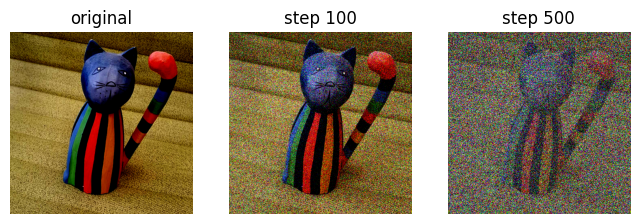

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

def test_noise_scheduler():

    def show(image, idx, title):
        plt.subplot(1, 3, idx)
        plt.imshow(image.squeeze(dim=0).permute(1, 2, 0))
        plt.axis('off')
        plt.title(title)

    plt.figure(figsize=[8, 3])

    #打印原始图片
    image = data['pixel_values']
    show(image, 1, 'original')

    #随机噪声
    noise = torch.randn(image.shape)

    #混合到100步
    image_noise = noise_scheduler.add_noise(image, noise,
                                            torch.LongTensor([100]))
    show(image_noise, 2, 'step 100')

    #混合到500步
    image_noise = noise_scheduler.add_noise(image, noise,
                                            torch.LongTensor([500]))
    show(image_noise, 3, 'step 500')

    plt.show()


test_noise_scheduler()

In [8]:
def forward(data):
    device = data['pixel_values'].device

    #使用vae压缩原图像
    #[1, 3, 512, 512] -> [1, 4, 64, 64]
    latents = vae.encode(data['pixel_values']).latent_dist.sample().detach()
    latents = latents * 0.18215

    #随机b张噪声图
    #[1, 4, 64, 64]
    noise = torch.randn(latents.shape).to(device)

    #随机采样0-1000之间的b个数字,为每张图片随机一个步数
    #[1]
    timesteps = torch.randint(0, 1000, (1, ), device=device).long()

    #把噪声添加到压缩图中,维度不变
    noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

    #编码文字
    #[1, 77, 768]
    encoder_hidden_states = text_encoder(data['input_ids'])[0]

    #根据文字信息,从混合图中把噪声图给抽取出来
    #[1, 4, 64, 64]
    noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample

    #求mse loss即可
    #[1, 4, 64, 64]
    loss = torch.nn.functional.mse_loss(noise_pred, noise, reduction='none')
    #[1, 4, 64, 64] -> [1]
    loss = loss.mean(dim=[1, 2, 3])

    return loss


forward(data)

tensor([0.1340], grad_fn=<MeanBackward1>)

In [9]:
from diffusers import PNDMScheduler, StableDiffusionPipeline
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
from transformers import CLIPFeatureExtractor


def save():
    #保存模型
    pipeline = StableDiffusionPipeline(
        text_encoder=text_encoder,
        vae=vae,
        unet=unet,
        tokenizer=tokenizer,
        scheduler=PNDMScheduler(beta_start=0.00085,
                                beta_end=0.012,
                                beta_schedule='scaled_linear',
                                skip_prk_steps=True),
        safety_checker=StableDiffusionSafetyChecker.from_pretrained(
            'CompVis/stable-diffusion-safety-checker'),
        feature_extractor=CLIPFeatureExtractor.from_pretrained(
            'openai/clip-vit-base-patch32'),
    )
    pipeline.save_pretrained('models/cat_toy')
    #保存新词的映射
    learned_embeds = text_encoder.get_input_embeddings().weight[49408].detach(
    ).cpu()
    torch.save({49408: learned_embeds}, 'models/cat_toy/learned_embeds.bin')


save()

  0%|          | 0/51 [00:00<?, ?it/s]

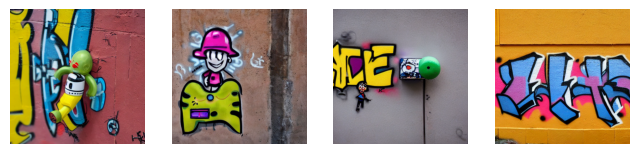

In [10]:
def test(prompt):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    #节省显存
    device = 'cpu'

    #加载
    pipe = StableDiffusionPipeline.from_pretrained('models/cat_toy',
                                                   torch_dtype=torch.float32)
    pipe = pipe.to(device)

    #运算
    images = pipe([prompt] * 4, num_inference_steps=50,
                  guidance_scale=7.5).images

    #画图
    def show(image, idx):
        plt.subplot(1, 4, idx)
        plt.imshow(image)
        plt.axis('off')

    plt.figure(figsize=[8, 3])
    for i in range(len(images)):
        show(images[i], i + 1)
    plt.show()


test('a grafitti in a wall with a <cat-toy> on it')

In [11]:
def train():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    global text_encoder
    global vae
    global unet

    text_encoder = text_encoder.to(device)
    vae = vae.to(device)
    unet = unet.to(device)

    optimizer = torch.optim.AdamW(
        text_encoder.get_input_embeddings().parameters(),
        lr=2e-3,
    )

    loss_mean = []
    for epoch in range(6000):
        for i, data in enumerate(loader):
            data['pixel_values'] = data['pixel_values'].to(device)
            data['input_ids'] = data['input_ids'].to(device)

            loss = forward(data)
            loss.backward()

            #把除了新词以外,其他词的梯度置为0
            grads = text_encoder.get_input_embeddings().weight.grad
            for j in range(grads.shape[0]):
                if j != 49408:
                    grads[j, :] = 0

            optimizer.step()
            optimizer.zero_grad()

            loss_mean.append(loss.item())

        if epoch % 30 == 0:
            print(epoch, np.mean(loss_mean))
            loss_mean = []

    save()


train()

/tmp/ipykernel_18209/4077063204.py:35: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((512, 512), resample=PIL.Image.BICUBIC)


0 0.1856692365836352
30 0.17824360452553567
60 0.14499067047921319
90 0.159338842278036
120 0.14177757728224
150 0.13989509092255806
180 0.14165792892454193
210 0.15776106410194188
240 0.10515985504025593
270 0.12917986099491827
300 0.12319091800988341
330 0.14491546889573026
360 0.1546953214216046
390 0.1255302540725097
420 0.13022733115940355
450 0.1368237601534929
480 0.13564552884975759
510 0.13777494656193692
540 0.1442115039312436
570 0.12611397957856146
600 0.152722564599632
630 0.11623806928594907
660 0.14419977850241897
690 0.14131433145181896
720 0.11909651984654678
750 0.13842753443944578
780 0.13563036961907832
810 0.13068266041615667
840 0.14473473459365777
870 0.15313625351021376
900 0.13374023498229992
930 0.14832717303264265
960 0.12589231623569502
990 0.12109843368913668
1020 0.13179114401961367
1050 0.1587507363699842
1080 0.09951518667900625
1110 0.16211761907713176
1140 0.1558383595974495
1170 0.13955640395288355
1200 0.13489896589308045
1230 0.13157308859711822
126

  0%|          | 0/51 [00:00<?, ?it/s]

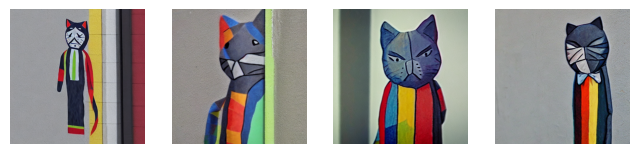

In [1]:
test('a grafitti in a wall with a <cat-toy> on it')